In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [5]:
dataDir='/home/ubuntu/wangxinglie/Desktop/datasets/VOCdevkit/ipsc_coco/train'
dataType='train'
annFile='{}/{}.json'.format(dataDir,dataType)

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Bad Good Medium

COCO supercategories: 
none


In [39]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['Bad','Good','Medium']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
# imgIds = coco.getImgIds(imgIds = [123])
# print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[0, 1, 2]
[4110, 5135, 4115, 8212, 533, 4631, 8222, 4639, 4643, 4133, 3117, 4144, 7736, 2618, 7744, 7745, 2643, 614, 7811, 7812, 7828, 7837, 7838, 7328, 5832, 5336, 5340, 4319, 4324, 4839, 744, 3817, 746, 4340, 7925, 4344, 7931, 3836, 3330, 7426, 776, 7946, 7435, 5912, 2844, 5926, 8512, 4417, 8513, 836, 8521, 8528, 852, 4439, 3417, 3418, 8541, 7518, 3423, 7520, 353, 865, 7523, 7524, 357, 2917, 7527, 3432, 2921, 3940, 3435, 371, 7542, 7544, 7545, 5021, 419, 8115, 8117, 447, 7519, 8144, 3538, 472, 6130, 5116]


In [36]:
# print(len(img))
# print(img.index[0])

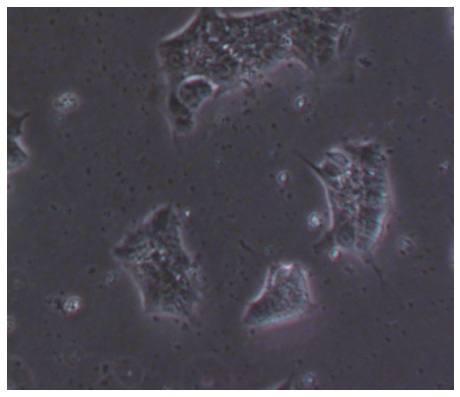

In [40]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('%s/%s'%(dataDir,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

[{'area': 76826, 'iscrowd': 0, 'image_id': 3330, 'bbox': [199, -1, 359, 214], 'category_id': 1, 'id': 664, 'ignore': 0, 'segmentation': []}, {'area': 49469, 'iscrowd': 0, 'image_id': 3330, 'bbox': [438, 189, 191, 259], 'category_id': 2, 'id': 665, 'ignore': 0, 'segmentation': []}, {'area': 16510, 'iscrowd': 0, 'image_id': 3330, 'bbox': [357, 383, 127, 130], 'category_id': 0, 'id': 666, 'ignore': 0, 'segmentation': []}, {'area': 36924, 'iscrowd': 0, 'image_id': 3330, 'bbox': [148, 302, 181, 204], 'category_id': 1, 'id': 667, 'ignore': 0, 'segmentation': []}]


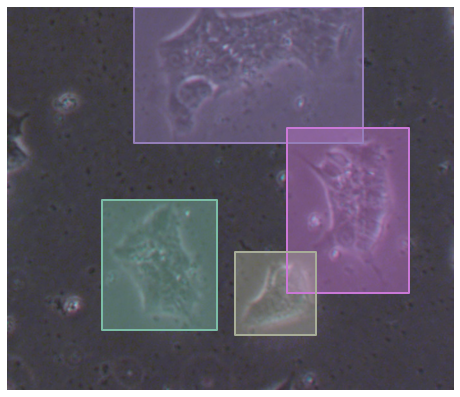

In [41]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns, draw_bbox=True)